# One-dimensional Steady State Diffusion

## Example 4.1
$\frac{d}{dx}\left(k\frac{dT}{dx}\right)=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
Problem specs:
Governing eqn(Steady 1-D Heat conduction eqn):
d/dx(kdT/dx) = 0

Domain lies along x-axis only

X--->

BC:T=100____________________BC:T=500
   (A)_________________________(B)
           K = 1000

Length of domain=0.5m

Discretised eqn. for eac nodes will be of the form

aw.T_W + ap.T_P + ae.T_E =S
S-source term
aw-west side nodal coefficient
ap-nodal coefficient(self)
ae-east side nodal coefficient

"""
x_start,x_finish = 0.0, 0.5
lx = x_finish - x_start
nx = 5 #no. of finite volumes using to solve the problem
k = 1000 # 1W/mK
A = 1e-2 # m^2
dx = lx / nx #uniform-interval between nodes
Ta = 100 #left-End(A) fixedTemperature BC
Tb = 500 #right-End(B) fixedHeatFlux BC
x = np.r_[x_start,np.linspace(x_start+dx/2, x_finish - dx/2, nx), x_finish]

#coefficients of Discretised form
def aw(n):
    return -k*A/dx

def ap(n):
    if n==1 or n==nx:
        return 3*k*A/dx
    else:
        return 2*k*A/dx

def ae(n):
    return -k*A/dx

def Su(n):
    if n==1:
        return 2*k*A/dx*Ta
    elif n==nx:
        return 2*k*A/dx*Tb
    else:
        return 0
    
mat = np.diag(list(map(ap,np.arange(1,nx+1))),0) + np.diag(list(map(aw,np.arange(1,nx))),-1)\
    + np.diag(list(map(ae,np.arange(1,nx))),1)
b = np.array(list(map(Su,np.arange(1,nx+1))))
sol = np.r_[Ta, np.linalg.solve(mat, b), Tb]

def Ext_sol1(x):
    return 800*x+100

ext = Ext_sol1(x)
error = ((sol-ext)/sol*100).round(2)
print('Error = ',error[1:-1])

Error =  [0. 0. 0. 0. 0.]


In [112]:
def Plot_result(sim_x, sim_y, exp_x, exp_y):
    fig, ax = plt.subplots(figsize=(4,4))
    ax.plot(sim_x, sim_y,'s', label='Numerical')
    ax.plot(exp_x, exp_y, label='Analytical')
    ax.set_title('Numerical Result vs. Analytical Solution', fontsize = 15, fontweight = 'bold', fontfamily='Times New Roman')
    ax.set_xlabel('Distance $x(m)$',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
    ax.set_ylabel('Temperature ($^\circ$C)',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
    # ax.set_xlim([np.min(x), np.max(x)])
    # ax.set_ylim([0, 600])
    ax.grid()
    ax.legend()
    plt.show()

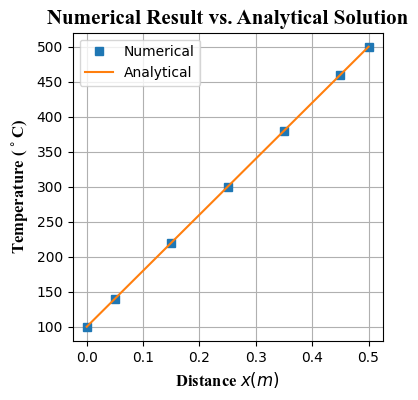

In [113]:
Plot_result(x, sol, x, ext)

## Example 4.2
$\frac{d}{dx}\left(k\frac{dT}{dx}\right)+q=0$

In [114]:
x_start,x_finish = 0.0, 0.02
lx = x_finish - x_start
nx = 5 #no. of finite volumes using to solve the problem
k = 0.5 # W/mK finite
A = 1 # m^2
dx = lx / nx #uniform-interval between nodes
q = 1000000 #kW/m^3 
Ta = 100 #left-End(A) fixedTemperature BC
Tb = 200 #right-End(B) fixedHeatFlux BC
x = np.r_[x_start,np.linspace(x_start+dx/2, x_finish - dx/2, nx), x_finish]
x2 = np.linspace(x_start, x_finish, 51)

#coefficients of Discretised form
def aw(n):
    return -k*A/dx

def ap(n):
    if n==1 or n==nx:
        return 3*k*A/dx
    else:
        return 2*k*A/dx

def ae(n):
    return -k*A/dx

def Su(n):
    if n==1:
        return q*A*dx+2*k*A/dx*Ta
    elif n==nx:
        return q*A*dx+2*k*A/dx*Tb
    else:
        return q*A*dx
    
mat = np.diag(list(map(ap,np.arange(1,nx+1))),0) + np.diag(list(map(aw,np.arange(1,nx))),-1)\
    + np.diag(list(map(ae,np.arange(1,nx))),1)
b = np.array(list(map(Su,np.arange(1,nx+1))))
sol = np.r_[Ta, np.linalg.solve(mat, b), Tb]

def Ext_sol2(x):
    return ((Tb-Ta)/L + q/2/k*(L-x))*x + Ta

ext = Ext_sol2(x2)
error = ((sol-Ext_sol2(x))/sol*100).round(2)
print('Error = ',error[1:-1])
mat, b

Error =  [2.67 1.83 1.57 1.55 1.74]


(array([[ 375., -125.,    0.,    0.,    0.],
        [-125.,  250., -125.,    0.,    0.],
        [   0., -125.,  250., -125.,    0.],
        [   0.,    0., -125.,  250., -125.],
        [   0.,    0.,    0., -125.,  375.]]),
 array([29000.,  4000.,  4000.,  4000., 54000.]))

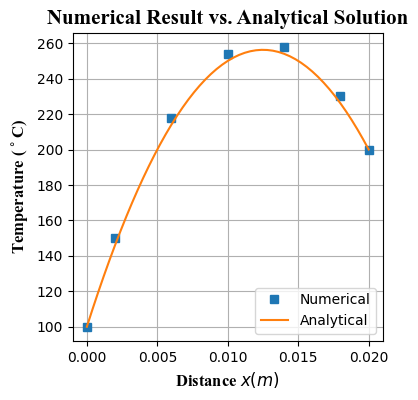

In [115]:
Plot_result(x, sol, x2, ext)

## Example 4.3
$\frac{d}{dx}\left(k\frac{dT}{dx}\right)+ hP\left(T-T\infty\right)=0$

In [2]:
# Course Grid
x_start,x_finish = 0.0, 1
lx = x_finish - x_start
nx = 5 # no. of finite volumes using to solve the problem
k = 0.5 # W/mK finite
n2 = 25 # m^2 hP/kA
A = 1 # m^2
dx = lx / nx # uniform-interval between nodes
q = 1000000 # kW/m^3 
TB = 100 # left-End fixedTemperature BC
Tinf = 20 # degree ambient temperature
x = np.r_[x_start,np.linspace(x_start+dx/2, x_finish - dx/2, nx), x_finish]
x2 = np.linspace(x_start, x_finish, 51)

#coefficients of Discretised form
def aw(n):
    return -1/dx

def ap(n):
    if n==1:
        return 1/dx + n2*dx+2/dx
    elif n==nx:
        return 1/dx + n2*dx
    else:
        return 2*1/dx + n2*dx

def ae(n):
    return -1/dx

def Su(n):
    if n==1:
        return n2*dx*Tinf + 2/dx*TB
    elif n==nx:
        return n2*dx*Tinf
    else:
        return n2*dx*Tinf
    
mat = np.diag(list(map(ap,np.arange(1,nx+1))),0) + np.diag(list(map(aw,np.arange(1,nx))),-1)\
    + np.diag(list(map(ae,np.arange(1,nx))),1)
b = np.array(list(map(Su,np.arange(1,nx+1))))
sol = np.linalg.solve(mat, b)
sol = np.r_[TB, sol, sol[-1]].round(2)

def Ext_sol3(x):
    return np.cosh(np.sqrt(n2)*(lx - x)) / (np.cosh(np.sqrt(n2)*lx))*(TB - Tinf) + Tinf

ext = Ext_sol3(x2)
error = ((sol-Ext_sol3(x))/sol*100).round(2)
print('Error = ',abs(error[1:-1]))

Error =  [6.69 2.59 0.42 0.28 0.4 ]


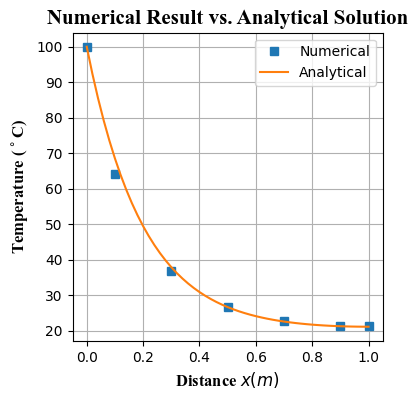

In [118]:
Plot_result(x, sol, x2, ext)

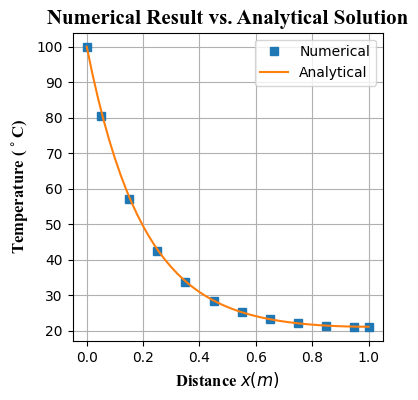

In [119]:
# Fine Grid
x_start,x_finish = 0.0, 1
lx = x_finish - x_start
nx = 10 # no. of finite volumes using to solve the problem
k = 0.5 # W/mK finite
n2 = 25 # m^2 hP/kA
A = 1 # m^2
dx = lx / nx # uniform-interval between nodes
q = 1000000 # kW/m^3 
TB = 100 # left-End fixedTemperature BC
Tinf = 20 # degree ambient temperature
x_fine = np.r_[x_start,np.linspace(x_start+dx/2, x_finish - dx/2, nx), x_finish]

mat = np.diag(list(map(ap,np.arange(1,nx+1))),0) + np.diag(list(map(aw,np.arange(1,nx))),-1)\
    + np.diag(list(map(ae,np.arange(1,nx))),1)
b = np.array(list(map(Su,np.arange(1,nx+1))))
sol2 = np.linalg.solve(mat, b)
sol2 = np.r_[TB, sol2, sol2[-1]].round(2)

Plot_result(x_fine, sol2, x2, ext)

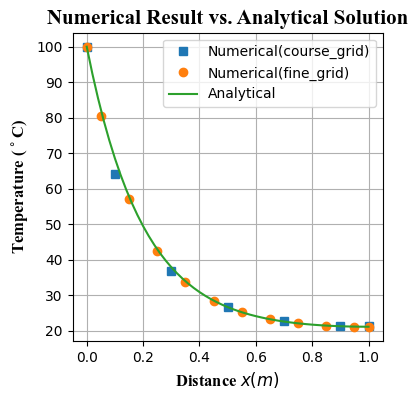

In [120]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, sol,'s', label='Numerical(course_grid)')
ax.plot(x_fine, sol2, 'o', label='Numerical(fine_grid)')
ax.plot(x2, ext, label='Analytical')
ax.set_title('Numerical Result vs. Analytical Solution', fontsize = 15, fontweight = 'bold', fontfamily='Times New Roman')
ax.set_xlabel('Distance $x(m)$',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
ax.set_ylabel('Temperature ($^\circ$C)',fontsize = 12, fontweight = 'bold', fontfamily='Times New Roman')
# ax.set_xlim([np.min(x), np.max(x)])
# ax.set_ylim([0, 600])
ax.grid()
ax.legend()
plt.show()

In [121]:
error = ((sol-Ext_sol3(x))/sol*100).round(2)
print('Course Grid Error = ',abs(error[1:-1]))

Course Grid Error =  [6.69 2.59 0.42 0.28 0.4 ]


In [122]:
error = ((sol2-Ext_sol3(x_fine))/sol2*100).round(2)
print('Fine Grid Error = ',abs(error[1:-1]))

Fine Grid Error =  [2.12 1.48 0.95 0.51 0.23 0.04 0.06 0.11 0.11 0.09]
